<a href="https://colab.research.google.com/github/ameyvadnere/CS418-Statistical-Pattern-Recognition-Lab/blob/master/Assn2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import numpy as np
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
newsgroups_filter = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
#newsgroups_quotes = fetch_20newsgroups(remove=('headers', 'footers'))
newsgroups_nofilter = fetch_20newsgroups()

In [ ]:
print(newsgroups_nofilter.data[1])

In [ ]:
print(newsgroups_filter.data[1])

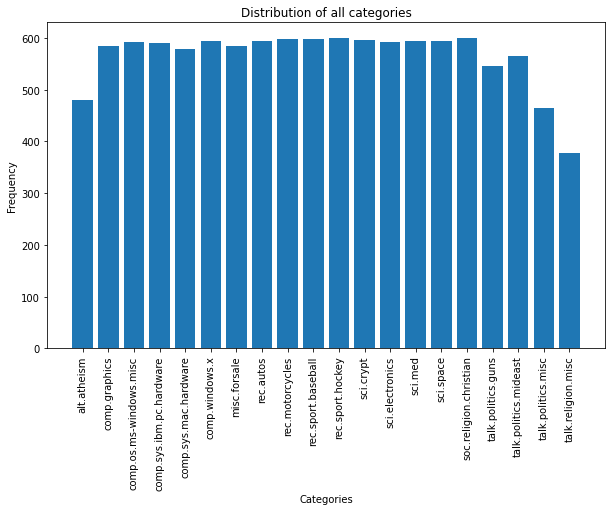

In [ ]:
plt.subplots(figsize =(10, 6))
plot_data = [sum((newsgroups_filter.target==i)) for i in range(20)]
plt.bar(newsgroups_filter.target_names,plot_data)
plt.xticks(rotation = 'vertical')
plt.title('Distribution of all categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def build_vocab(data, stopwords = [], punctuations = []):
  vocab = {}
  for doc in data:
    for line in doc.splitlines():
      #print(line)
      line_p = "".join([char for char in line if char not in punctuations])
      #print(line_p)
      #print(line_p.split())
      for word in line_p.split():
        if word.lower() not in vocab:
          vocab[word.lower()] = 1
        else:
          vocab[word.lower()] += 1
  return vocab


In [ ]:
vocab = {}
vocab = build_vocab(data = newsgroups_filter.data, punctuations=list(string.punctuation))

In [ ]:
#list(string.punctuation)

In [ ]:
len(vocab)

106333

In [ ]:
import operator
sorted_vocab = sorted(vocab.items(),key=operator.itemgetter(1),reverse=True)

In [ ]:
sorted_vocab[0:20]

[('the', 106234),
 ('to', 52841),
 ('of', 46831),
 ('a', 43051),
 ('and', 42351),
 ('in', 30801),
 ('is', 30302),
 ('i', 28753),
 ('that', 26948),
 ('it', 20895),
 ('for', 19923),
 ('you', 16922),
 ('this', 14460),
 ('on', 14251),
 ('be', 13757),
 ('are', 13010),
 ('have', 12831),
 ('with', 12648),
 ('not', 12518),
 ('as', 11341)]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(newsgroups_filter.data, newsgroups_filter.target, test_size=0.2, random_state=42)

In [ ]:
len(newsgroups_filter.data)

11314

In [ ]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))


9051 9051
2263 2263


In [ ]:
def priors(y, classnames):
  return {i : (y==i).mean() for i in classnames}


In [ ]:
priors_train = priors(y_train, range(20))
priors_train

{0: 0.042315766213678045,
 1: 0.053032814053695726,
 2: 0.05259087393658159,
 3: 0.0515965086730748,
 4: 0.049939233233896804,
 5: 0.05380620925864545,
 6: 0.05259087393658159,
 7: 0.050270688321732405,
 8: 0.05259087393658159,
 9: 0.05469008949287372,
 10: 0.05435863440503812,
 11: 0.0519279637609104,
 12: 0.052701358965860125,
 13: 0.05248038890730306,
 14: 0.051486023643796265,
 15: 0.052701358965860125,
 16: 0.04695613744337642,
 17: 0.05104408352668213,
 18: 0.039553640481714725,
 19: 0.033366478842116895}

In [ ]:
newsgroups_filter.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
list(priors_train.values())

[0.042315766213678045,
 0.053032814053695726,
 0.05259087393658159,
 0.0515965086730748,
 0.049939233233896804,
 0.05380620925864545,
 0.05259087393658159,
 0.050270688321732405,
 0.05259087393658159,
 0.05469008949287372,
 0.05435863440503812,
 0.0519279637609104,
 0.052701358965860125,
 0.05248038890730306,
 0.051486023643796265,
 0.052701358965860125,
 0.04695613744337642,
 0.05104408352668213,
 0.039553640481714725,
 0.033366478842116895]

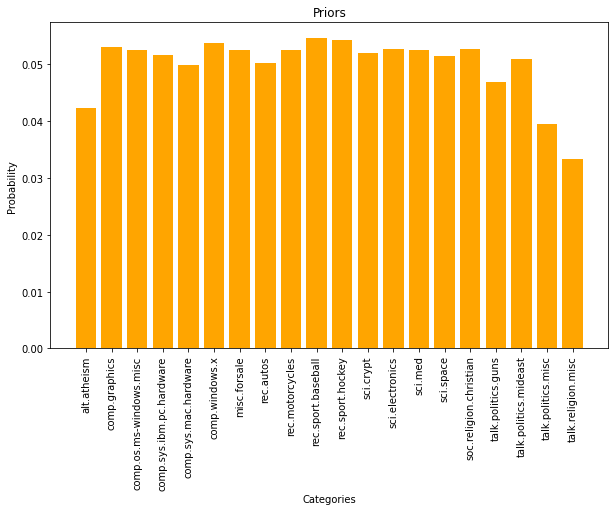

In [ ]:
plt.subplots(figsize =(10, 6))
plot_data = list(priors_train.values())
plt.bar(newsgroups_filter.target_names,plot_data, color = 'orange')
plt.xticks(rotation = 'vertical')
plt.title('Priors')
plt.xlabel('Categories')
plt.ylabel('Probability')
plt.show()

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit_transform(corpus)

<106333x106292 sparse matrix of type '<class 'numpy.int64'>'
	with 106295 stored elements in Compressed Sparse Row format>

In [ ]:
set(corpus).difference(set(vectorizer.get_feature_names()))

In [ ]:
X_train_vector = vectorizer.transform(X_train)

In [ ]:
X_train_vector.shape, type(X_train_vector)

((9051, 106292), scipy.sparse.csr.csr_matrix)

In [ ]:
X_train_vector[1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
def fit_multinomial_model(X, y, class_names, alpha = 0):
  #probs = np.empty([np.unique(y), len(vectorizer.get_feature_names())])
  W = {}
  #class_names = np.sort(np.unique(y))
  vectorizer = CountVectorizer()
  X_vector = vectorizer.fit_transform(X)
  #print(X_vector.shape)
  for i in class_names: 
    word_count = X_vector[y==i].sum(axis=0)
    #print(word_count.shape)
    total_words = word_count.sum()
    W[i] = (word_count + alpha)/(total_words + alpha * len(vectorizer.get_feature_names()))
  
  return vectorizer, W




In [ ]:
def predict(X, vectorizer, W, priors_train, classnames):
  X_vector = vectorizer.transform(X)
  preds = np.empty((X_vector.shape[0], len(classnames)))
  for i, c in enumerate(classnames):
    likelihood = np.log(priors_train[c]) + np.log(W[c]) @ X_vector.T    # (1,2000)
    preds[:,i] = likelihood.flatten()
  
  column_indices = preds.argmax(axis = 1)
  return np.array(classnames)[column_indices]



In [ ]:
train_preds = predict(X_train, vectorizer, W, priors_train, range(20))

In [ ]:
(train_preds==y_train).mean()

0.8743785217103083

In [ ]:
test_preds = predict(X_test, vectorizer, W, priors_train, range(20))
(test_preds==y_test).mean()


0.7127706584180291

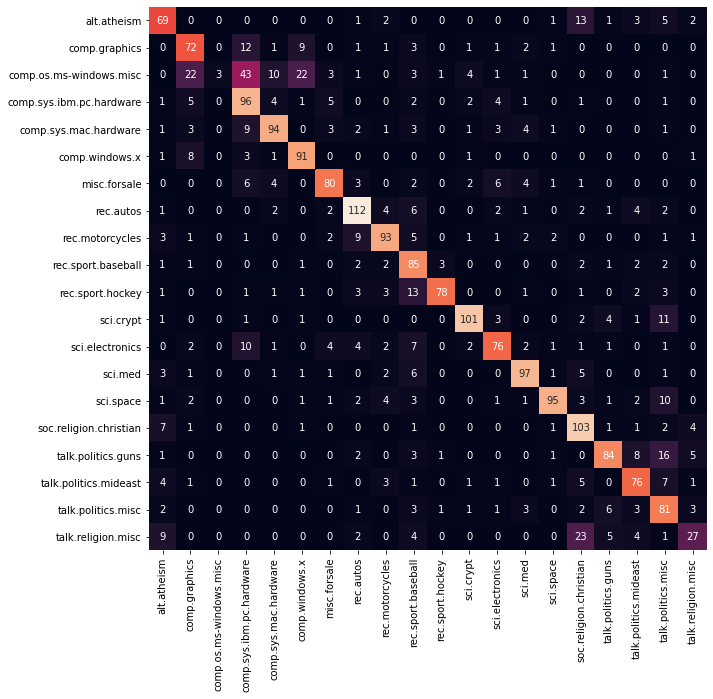

In [ ]:
cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.0f', cbar=False, xticklabels=newsgroups_filter.target_names, yticklabels=newsgroups_filter.target_names);

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

vectors_test = vectorizer.transform(X_test)
clf = MultinomialNB(alpha=0.1)
clf.fit(vectorizer.transform(X_train), y_train)
pred = clf.predict(vectors_test)
metrics.accuracy_score(y_test, pred)

0.7127706584180291